# Анализ успешности игр на рынке.

## Цель проекта

Интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Загрузка данных
### Подготовка данных
Необходимо заменить названия столбцов (приведите к нижнему регистру);

Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

Обработайте пропуски при необходимости:

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

Опишите причины, которые могли привести к пропускам;

Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Исследовательский анализ данных


Проанализировать, сколько игр выпускалось в разные годы. За какой период нужно рассматривать данные для прогноза на 2017г.

Проанализировать, как менялись продажи по платформам. 

Проанализировать платформы с наибольшими суммарными продажами и постройте распределение по годам. 

В какой характерный срок появляются новые и исчезают старые платформы.

Какие платформы лидируют по продажам, растут или падают. Какие платформы потенциально прибыльны.

Проанализировать графике «ящик с усами» глобальные продажи игр в разбивке по платформам. 

Проанализировать, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

На основании  диаграммы рассеяния и корреляционной матрицы между отзывами и продажами. Вывести выводы.

Соотнести выводы с продажами игр на других платформах.

Проанализировать общее распределение игр по жанрам. какие самые прибыльные жанры? Выделяются ли жанры с высокими и низкими продажами?

### Составление портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5).

Опишите различия в долях продаж.

Самые популярные жанры (топ-5). 

Поясните разницу.

Влияние рейтинга ESRB на продажи в отдельном регионе.

### Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action и Sports разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.
### Выводы


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import calendar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats as st
from scipy.stats import binom, norm 
from math import sqrt



In [2]:
try:
    data = pd.read_csv('games.csv'  ) # Пользователи 
except:
    data = pd.read_csv('/datasets/games.csv') 

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Данные в таблице представлены следующих типов: object, float64, int64.
Присутствуют столбцы с отсутствием данных.

# Подготовка данных
Необходимо заменить названия столбцов (приведите к нижнему регистру);

Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

Обработайте пропуски при необходимости:

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

Опишите причины, которые могли привести к пропускам;

Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Приведение к нижнему регистру названия столбцов

In [6]:
data.columns = data.columns.str.lower()

 Проверка на явные дубликаты

In [7]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [8]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [10]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [11]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [12]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [13]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Так как количество игр очень велико и  среди них могут быть не явно выраженные дубликаты приведем все названия игр к нижнему регисту

In [14]:
data['name'] = data['name'].str.lower()

In [15]:
data.duplicated().sum()

0

In [16]:
data=data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

In [17]:
 data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

In [18]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Так как рейтинг пользователей и критиков отличается на десятки приведем рейтинг пользователей к рейтингу критиков для упрочения анализа.

In [19]:
data['user_score'] = data['user_score'].replace('tbd', float('nan')).astype(float)

In [20]:
data['user_score'] = data['user_score']*10

In [21]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [22]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN



Пропус в столбцах name и genre относится к двум записям 659 и 14244.    
На основе данных из открытых источников  https://en.wikipedia.org/wiki/Mortal_Kombat_II
Можно установть, что данная запись относится к игре Mortal kombat 2 
"The Genesis version went on to sell 1.78 million copies in the United States"
"Release Arcade NA: November 1993"

По согласванию с  преподователем данные о культовой игре Mortal kombat 2 восстановм их из доступных источников.
Данные  по записи 14244 найти не удалость по этому данную запись удалим.




In [23]:
data.loc[659, 'name'] = 'Mortal Kombat 2'
data.loc[659, 'genre'] = 'Fighting'
#data.loc[659, 'jp_sales'] = 
data.loc[659, 'critic_score'] = 86 #Aggregate scores SMD: 86%
#data.loc[659, 'user_score'] = 
#data.loc[659, 'rating'] = 


In [24]:
#data.drop(14244, inplace=True)

In [25]:
data[['critic_score',
                'user_score',
                ]].corr(numeric_only=True)

,critic_score,user_score
critic_score,1.000000,0.581122
user_score,0.581122,1.000000


Так как корреляция между данными столбцов  'critic_score' и 'user_score' средняя и порой данные между рейтингами пользователей и критиков сильно разняться оставим  пропущенные значения без изменений.

In [26]:
data.insert(loc=8, column='all_sales', value=data[['na_sales', 'eu_sales', 'jp_sales','other_sales']].sum(axis=1))

In [27]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,80.0,E
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,83.0,E
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,80.0,E
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16711,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16713,spirits & spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


### Выводы по подготовке данных

Заменены названия столбцов на нижний  регист (приведите к нижнему регистру);

### Преобразование данных в нужные типы.
Так как рейтинг пользователей и критиков отличается на десятки привели рейтинг пользователей к рейтингу критиков для упрочения анализа.
В столбцах year_of_release , critic_score, user_score заменен тип данных с float64 на int64, так как в данных столбцах используются только целые числа.
'user_score' заменим значения 'tbn' на 'nan' так как 'tbn' - to be determined Акроним служит для отметки неясностей или пропусков. В данном случае это говорит, что пользователь не определился с оценкой соотвественно. Что связь между рейтингом

Так как количество игр очень велико и  среди них могли быть не явно выраженные дубликаты  все названия игр привели к нижнему регисту

### Обработка пропусков:

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

Опишите причины, которые могли привести к пропускам;

Пропус в столбцах name и genre относится к двум записям 659 и 14244.
На основе данных из открытых источников https://en.wikipedia.org/wiki/Mortal_Kombat_II Можно установть, что данная запись относится к игре Mortal kombat 2 "The Genesis version went on to sell 1.78 million copies in the United States" "Release Arcade NA: November 1993"

По согласванию с преподователем данные о культовой игре Mortal kombat 2 восстановм их из доступных источников. Данные по записи 14244 найти не удалость по этому данную запись удалим.

Часть пропусков в стобце 'year_of_release' удалость восстановить по релизам игр на других платформах.

'tbn' - to be determined Акроним служит для отметки неясностей или пропусков.  В данном случае это говорит, что пользователь не  определился с оценкой соотвественно. Что связь между  рейтингом 


### Посчитаны суммарные продажи во всех регионах.
Добавлен столбец 'all_sales'c суммарными продажами во всех регионах.

# Исследовательский анализ данных


Проанализировать, сколько игр выпускалось в разные годы. За какой период нужно рассматривать данные для прогноза на 2017г.

Проанализировать, как менялись продажи по платформам. 

Проанализировать платформы с наибольшими суммарными продажами и постройте распределение по годам. 

В какой характерный срок появляются новые и исчезают старые платформы.

Какие платформы лидируют по продажам, растут или падают. Какие платформы потенциально прибыльны.

Проанализировать графике «ящик с усами» глобальные продажи игр в разбивке по платформам. 

Проанализировать, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

На основании  диаграммы рассеяния и корреляционной матрицы между отзывами и продажами. Вывести выводы.

Соотнести выводы с продажами игр на других платформах.

Проанализировать общее распределение игр по жанрам. какие самые прибыльные жанры? Выделяются ли жанры с высокими и низкими продажами?



### Количество  релизов по платформам в разные года

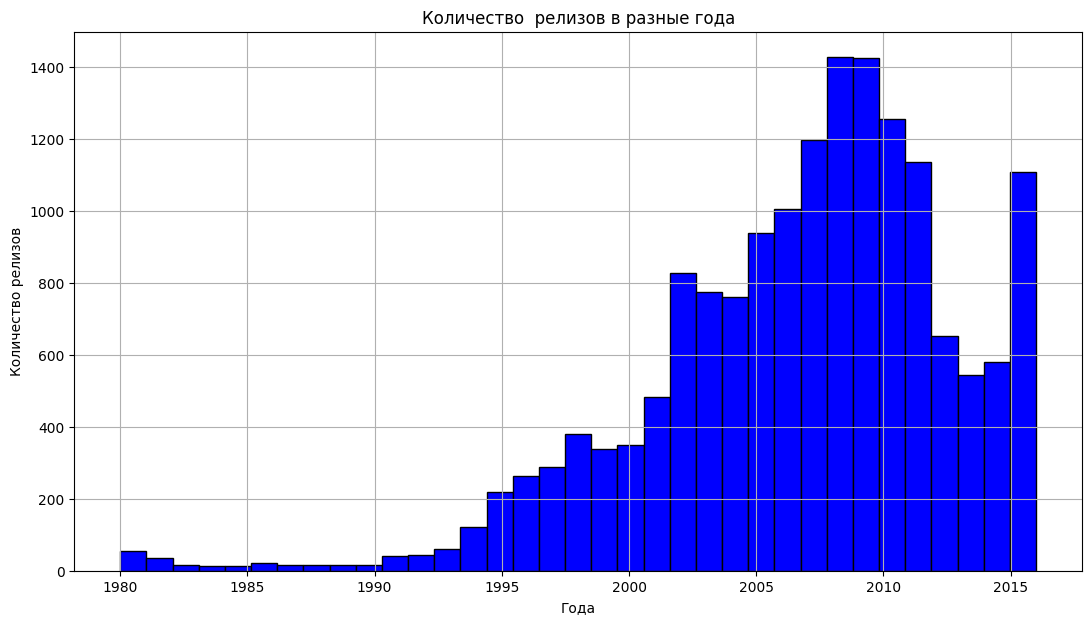

In [28]:
data['year_of_release'].hist(bins = 35, grid=True, figsize = (13,7), color = 'blue', edgecolor = 'black');

plt.title('Количество  релизов в разные года')
plt.xlabel('Года')
plt.ylabel('Количество релизов')


plt.grid(True)
plt.show()

### Вывод по количеству  релизов  в разные года

Можно отметить что существенный рост  игровой индустрии начался в 1995 году и длился до 2010.

Начиная с 2010 количество выпускаемых игр стало падать.

Максимальное количество релизов было 2009-2010 году в эти года выпускалось по 1400 игры.


In [29]:
data_sale_count = data.groupby(['platform', 'year_of_release']).size().reset_index(name='release_count')

In [30]:
data_sale_count.sort_values('release_count', ascending=False).reset_index(drop=True).head(50)

,platform,year_of_release,release_count
0,DS,2008,492
1,DS,2009,403
2,DS,2007,376
3,Wii,2009,325
4,DS,2010,323
5,Wii,2008,282
6,PS2,2002,280
7,PS2,2005,260
8,PS2,2004,259
9,PS2,2006,259


In [31]:
data_sale_count.describe()

,year_of_release,release_count
count,238.0,238.000000
mean,2002.47479,69.092437
std,9.030036,84.760819
min,1980.0,1.000000
25%,1996.0,6.000000
50%,2003.0,33.000000
75%,2010.0,106.000000
max,2016.0,492.000000


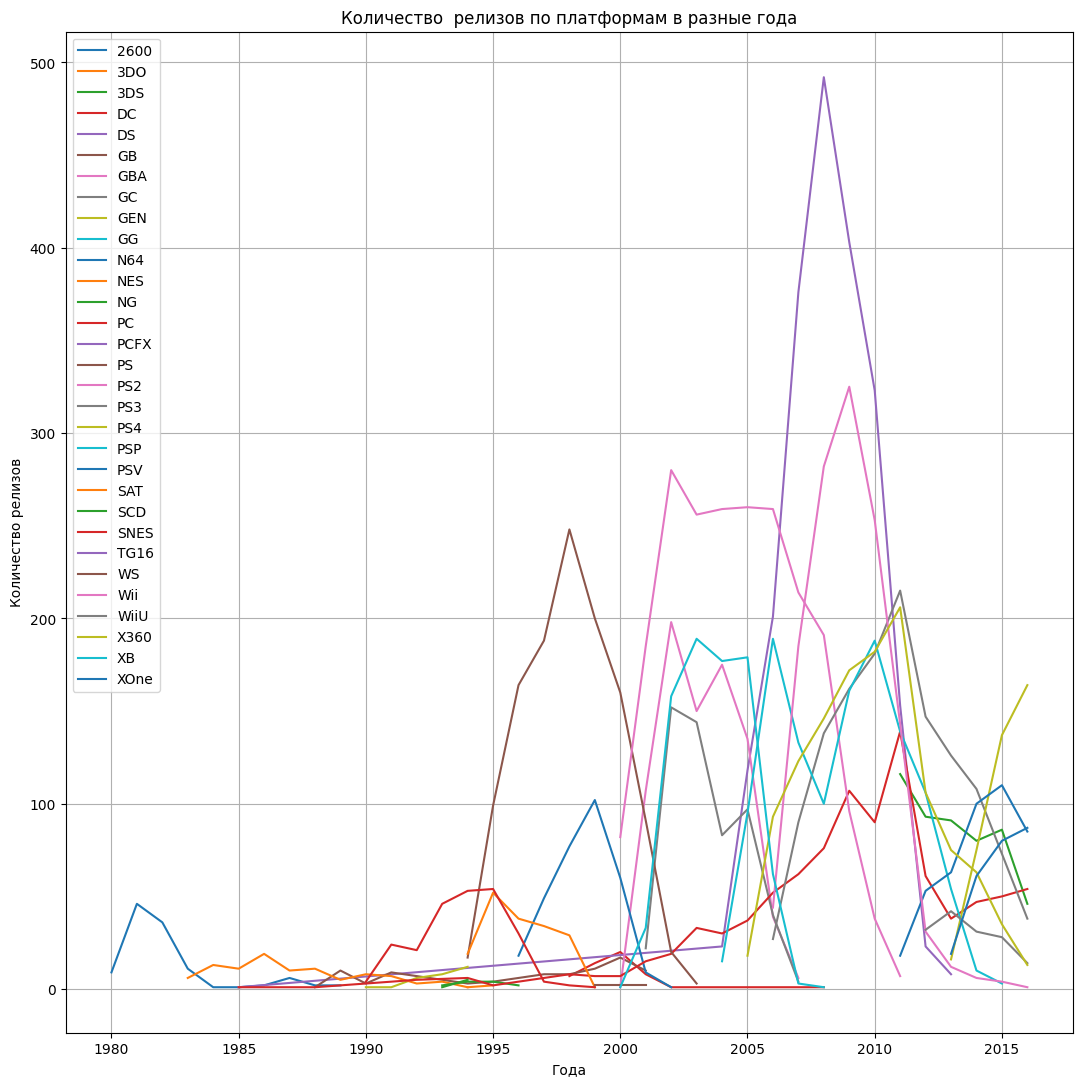

In [32]:
sales_by_year = data.groupby(['platform', 'year_of_release'])['all_sales'].sum().reset_index()

plt.figure(figsize=(13, 13))
for platform in data_sale_count['platform'].unique():
    platform_data = data_sale_count[data_sale_count['platform'] == platform]
   
    if not platform_data.empty:
         plt.plot(platform_data['year_of_release'].to_numpy() , platform_data['release_count'].to_numpy() , label=platform)


plt.title('Количество  релизов по платформам в разные года')
plt.xlabel('Года')
plt.ylabel('Количество релизов')


plt.legend()
plt.grid(True)
plt.show()

In [33]:
data.groupby('platform')['year_of_release'].nunique().mean()

7.67741935483871

### Вывод по количеству  релизов по платформам в разные года
По полученной сводной диаграмме мы видим исторический срез развития игр и  развития платформ.
Видно что в разные года  возникали разные плаформы, средний жизненый цикл платформы 8 лет в основном срок жизни платформы лежит в диапазоне от 5 до 10 лет. Стоит отмеить что платформы выпузенные с 1980 по 1988 имели максимальный срок жизни от 13 до 31 года. 
Это связано с началом развития индустрии игр.

Можно отметить что существенный рост  игровой индустрии начался в 1995 году и длился до 2010.

Начиная с 2010 количество выпускаемых игр стало падать.

Максимальное количество релизов у платформы DS в 2008 году было выпушенно в 493 игры.




### Количество  продаж по платформам в разные года

In [34]:
data_sale = data.groupby(['platform','year_of_release']).agg({'all_sales': 'sum'}).reset_index()

In [35]:
data_sale.sort_values('all_sales', ascending=False).reset_index(drop=True).head(50)

,platform,year_of_release,all_sales
0,PS2,2004,211.81
1,Wii,2009,206.97
2,PS2,2002,205.38
3,PS2,2003,184.31
4,Wii,2008,171.32
5,X360,2010,170.03
6,PS,1998,169.49
7,PS2,2001,166.43
8,PS2,2005,160.66
9,PS3,2011,156.78


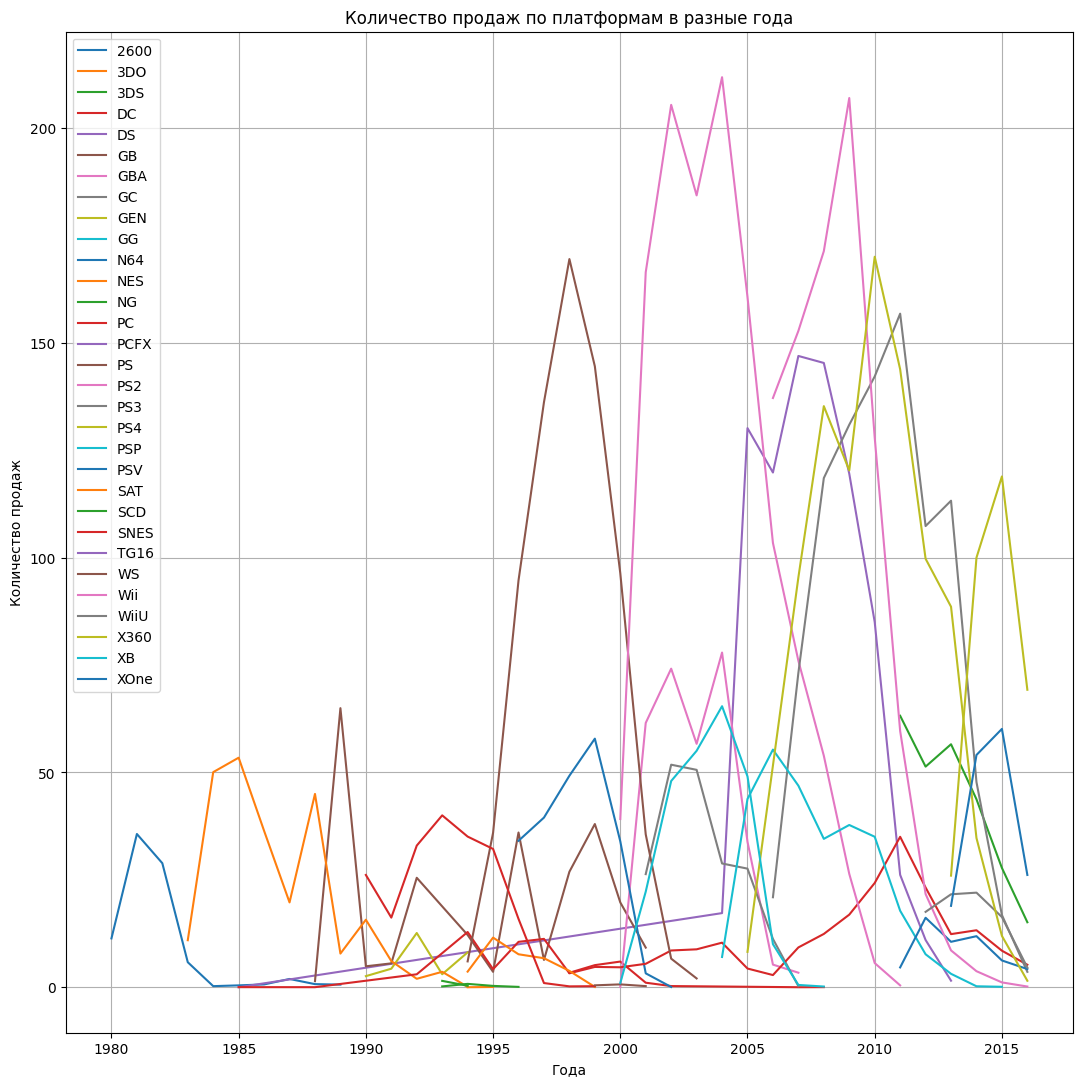

In [36]:
plt.figure(figsize=(13, 13))
for platform in data_sale['platform'].unique():
    platform_data = data_sale[data_sale['platform'] == platform]
   
    if not platform_data.empty:
        plt.plot(platform_data['year_of_release'].to_numpy() , platform_data['all_sales'].to_numpy() , label=platform)

plt.title('Количество продаж по платформам в разные года')
plt.xlabel('Года')
plt.ylabel('Количество продаж')


plt.legend()
plt.grid(True)
plt.show()

### Вывод по количеству  продаж по платформам в разные года

Стоит отметить следующие платформы, которые были лидерами рынка

PS в 1995-2000 с пиком продаж в 144.53 в 1999 году

PS2 в 2000-2005 с пиком продаж в 211.81 в 2004 году

Wii в 2005-2010  с пиком продаж 206.97 в 2009 году.

Учитвая полученные  результаты целесообразно взять актуальный период для прогноза 1/4-1/3 жизненого цикла продукта, это срок за который продук должен окупиться, учитывая средний жизненный цикл в 8 лет актуальный период следует принять в 2-3 года, соответсвенно это будет 2013-2016 год.

# Платформы с продажами

### Выберем платформы с наибольшими суммарными продажами и построем распределение релизов и продаж по годам

In [37]:
data_sale.sort_values('all_sales', ascending=False).reset_index(drop=True).head(10)

,platform,year_of_release,all_sales
0,PS2,2004,211.81
1,Wii,2009,206.97
2,PS2,2002,205.38
3,PS2,2003,184.31
4,Wii,2008,171.32
5,X360,2010,170.03
6,PS,1998,169.49
7,PS2,2001,166.43
8,PS2,2005,160.66
9,PS3,2011,156.78


In [38]:
platforms= data_sale.groupby('platform').agg({'all_sales': 'sum'}).sort_values(by='all_sales', ascending=False).head(5).index.to_list()
platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS']

Text(0, 0.5, 'Количество продаж')

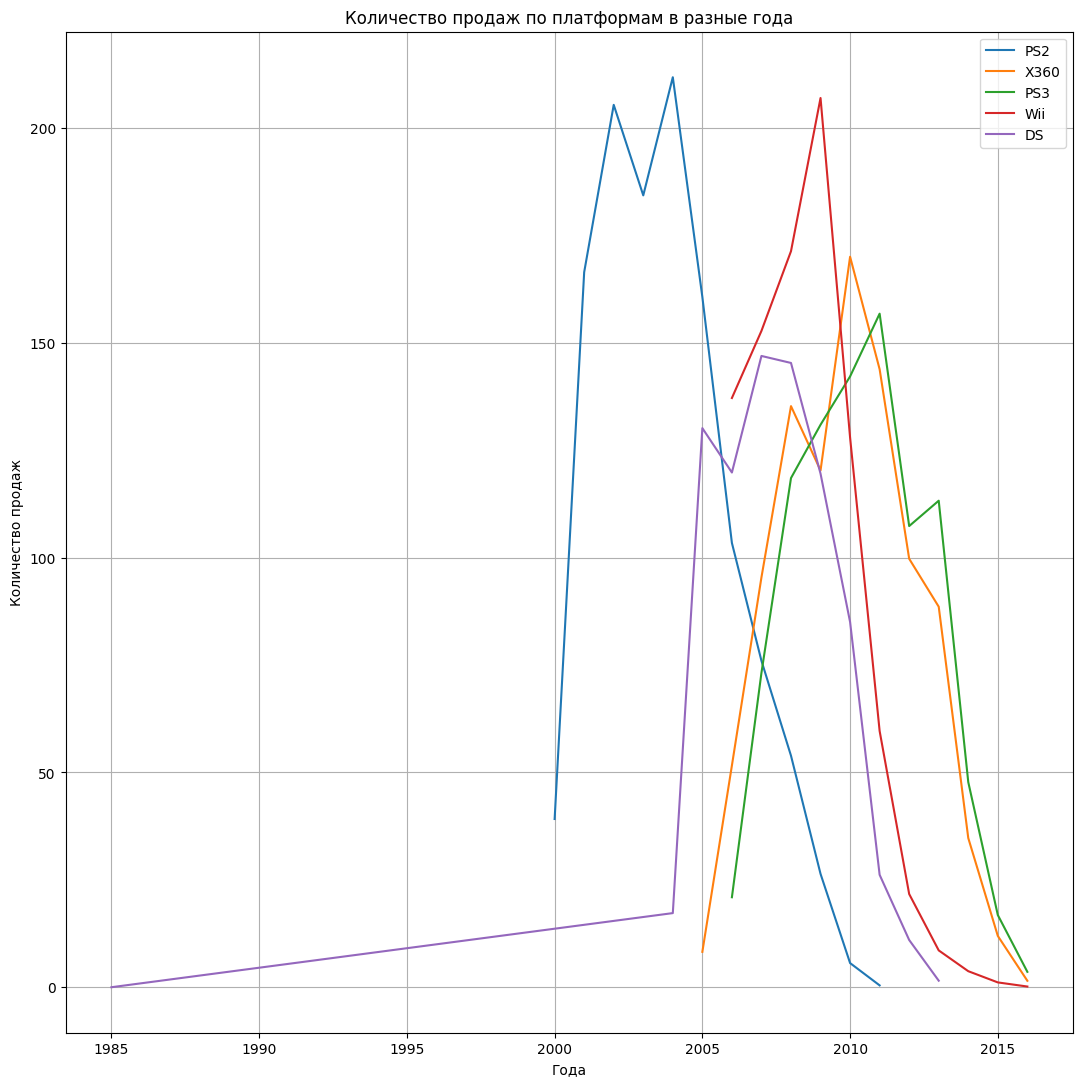

In [39]:

plt.figure(figsize=(13, 13))
platforms = platforms 

for platform in platforms:

    platform_data = data_sale[data_sale['platform'] == platform]
   
    if not platform_data.empty:
        plt.plot(platform_data['year_of_release'].to_numpy() , platform_data['all_sales'].to_numpy() , label=platform)


plt.legend()        
plt.grid(True)
plt.title('Количество продаж по платформам в разные года')
plt.xlabel('Года')
plt.ylabel('Количество продаж')





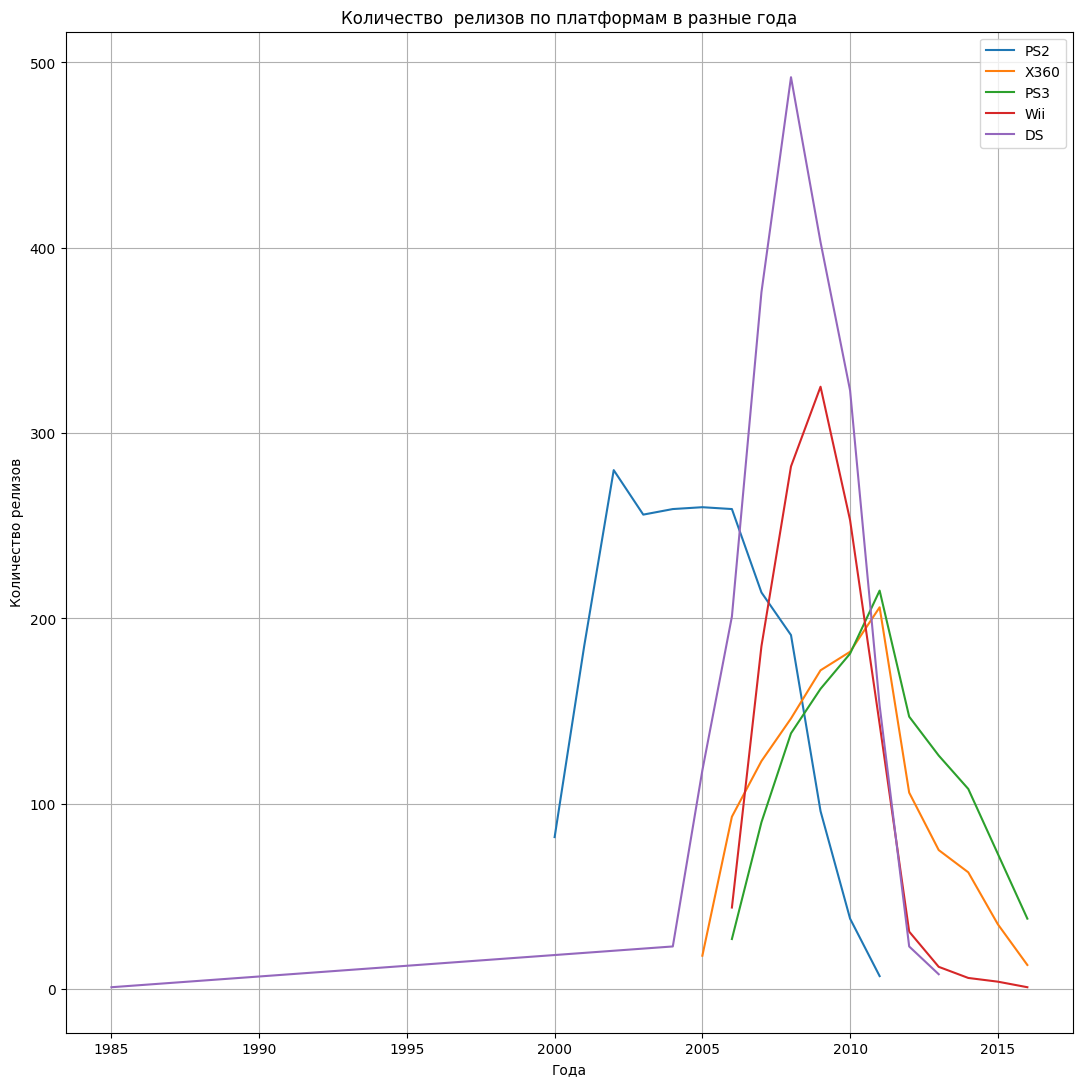

In [40]:
plt.figure(figsize=(13, 13))
platforms = platforms


for platform in platforms:
    platform_data = data_sale_count[data_sale_count['platform'] == platform]
   
    if not platform_data.empty:
        plt.plot(platform_data['year_of_release'].to_numpy() , platform_data['release_count'].to_numpy() , label=platform)
  

plt.title('Количество  релизов по платформам в разные года')
plt.xlabel('Года')
plt.ylabel('Количество релизов')


plt.legend()
plt.grid(True)
plt.show()

### Вывод по количеству  продаж  платформ лидеров в разные года

Стоит отметить следующие платформы, которые были лидерами рынка

PS2 в 2000-2005 с пиком продаж в 211.81 в 2004 году

Wii в 2005-2010  с пиком продаж 206.97 в 2009 году.

Учитвая полученные  результаты целесообразно взять актуальный период для прогноза 1/4-1/3 жизненого цикла продукта, это срок за который продук должен окупиться, учитывая средний жизненный цикл в 8 лет актуальный период следует принять в 2-3 года, соответсвенно это будет 2013-2016 год.

# Актуальный период 2013-2016

In [41]:
data=data[data['year_of_release'] > 2012]


In [42]:
platform_data['year_of_release']

25    1985
26    2004
27    2005
28    2006
29    2007
30    2008
31    2009
32    2010
33    2011
34    2012
35    2013
Name: year_of_release, dtype: Int64

### Количество  релизов по платформам в актуальный период

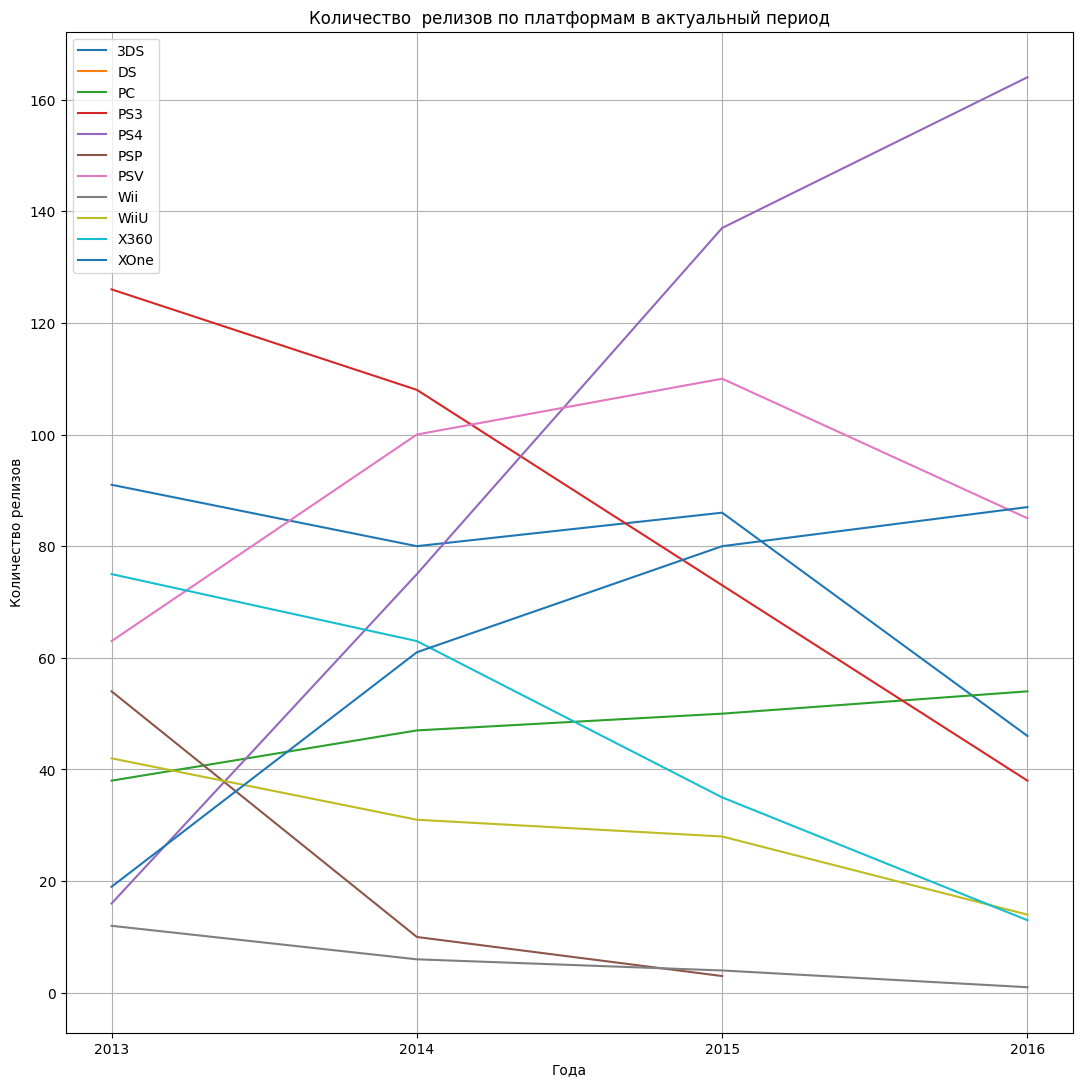

In [43]:
sales_by_year = data.groupby(['platform', 'year_of_release'])['all_sales'].sum().reset_index()

plt.figure(figsize=(13, 13))
for platform in data_sale_count['platform'].unique():
    platform_data = data_sale_count[data_sale_count['platform'] == platform]
    platform_data = platform_data[platform_data['year_of_release'] > 2012]   
    if not platform_data.empty:
        plt.plot(platform_data['year_of_release'].to_numpy() , platform_data['release_count'].to_numpy() , label=platform)


plt.title('Количество  релизов по платформам в актуальный период')
plt.xticks() # шаг меток по оси Y, цвет и размер 

plt.xlabel('Года')
plt.ylabel('Количество релизов')
plt.xticks(platform_data['year_of_release'].tolist())

plt.legend()
plt.grid(True)
plt.show()

### Количество продаж по платформам в актуальный период

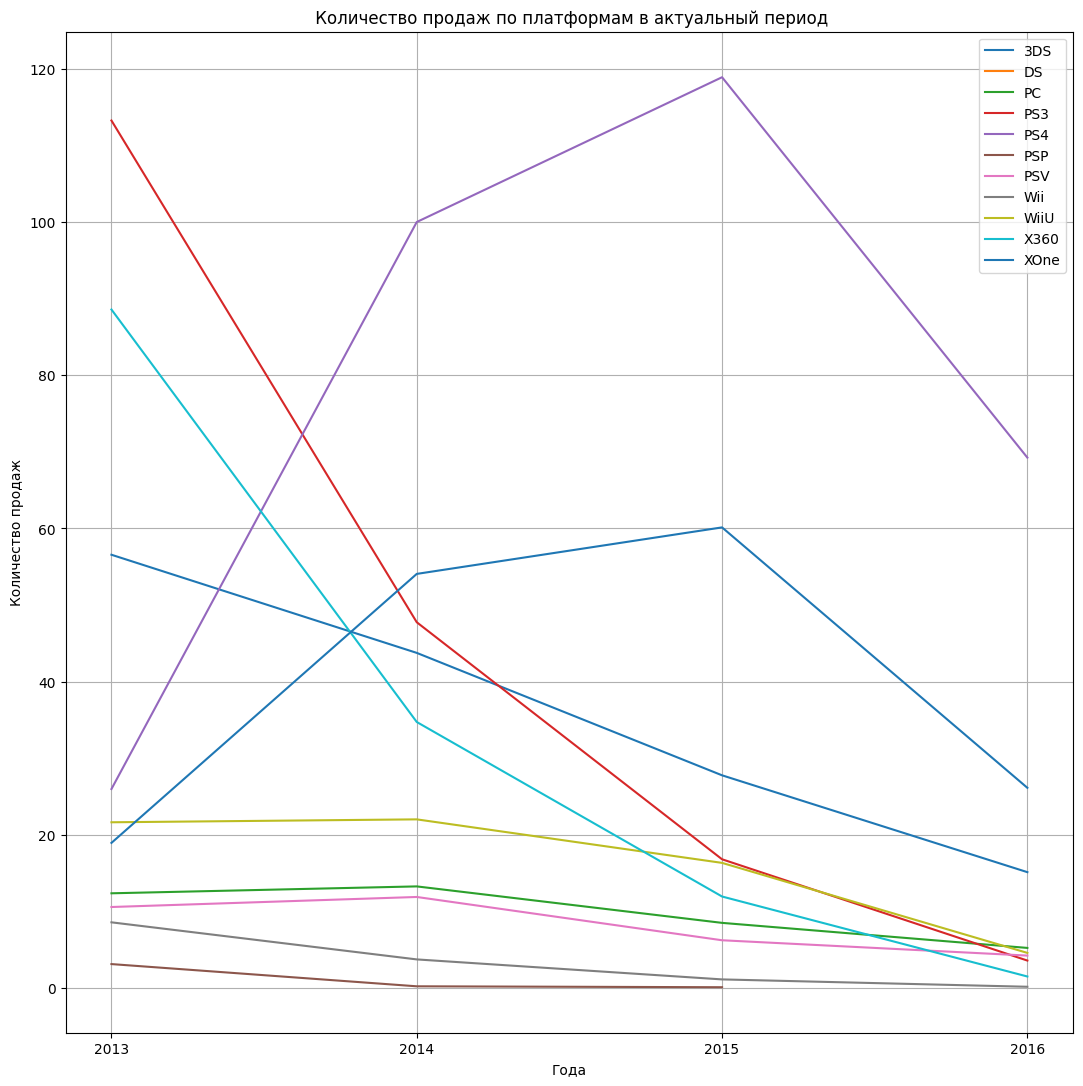

In [44]:

plt.figure(figsize=(13, 13))
for platform in data_sale['platform'].unique():
    platform_data = data_sale[data_sale['platform'] == platform]
    platform_data = platform_data[platform_data['year_of_release'] >2012]   
    
    if not platform_data.empty:
        plt.plot(platform_data['year_of_release'].to_numpy() ,  platform_data['all_sales'].to_numpy() , label=platform)

plt.xticks(platform_data['year_of_release'].tolist())
plt.title(' Количество продаж по платформам в актуальный период')
plt.xlabel('Года')
plt.ylabel('Количество продаж')


plt.legend()
plt.grid(True)
plt.show()

In [45]:
data_sale[data_sale['year_of_release']>2015].sort_values('all_sales', ascending=False).reset_index(drop=True).head(5)

,platform,year_of_release,all_sales
0,PS4,2016,69.25
1,XOne,2016,26.15
2,3DS,2016,15.14
3,PC,2016,5.25
4,WiiU,2016,4.60


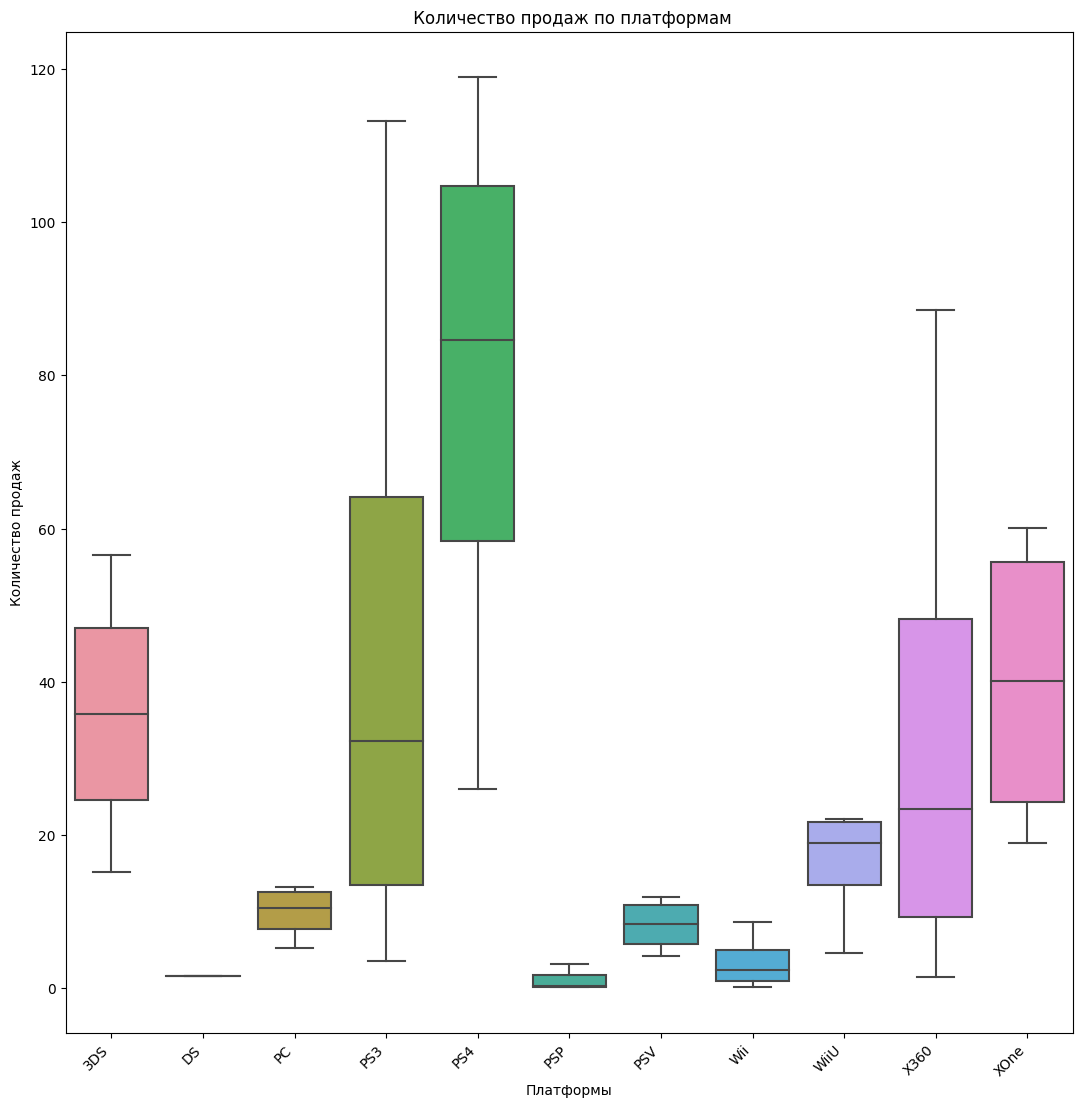

In [46]:
plt.figure(figsize=(13, 13))
data_sale = data_sale[data_sale['year_of_release'] >2012]   
sns.boxplot(x='platform', y=data_sale['all_sales'], data=data_sale)
plt.title(' Количество продаж по платформам')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')

plt.xticks(rotation=45,ha='right' );

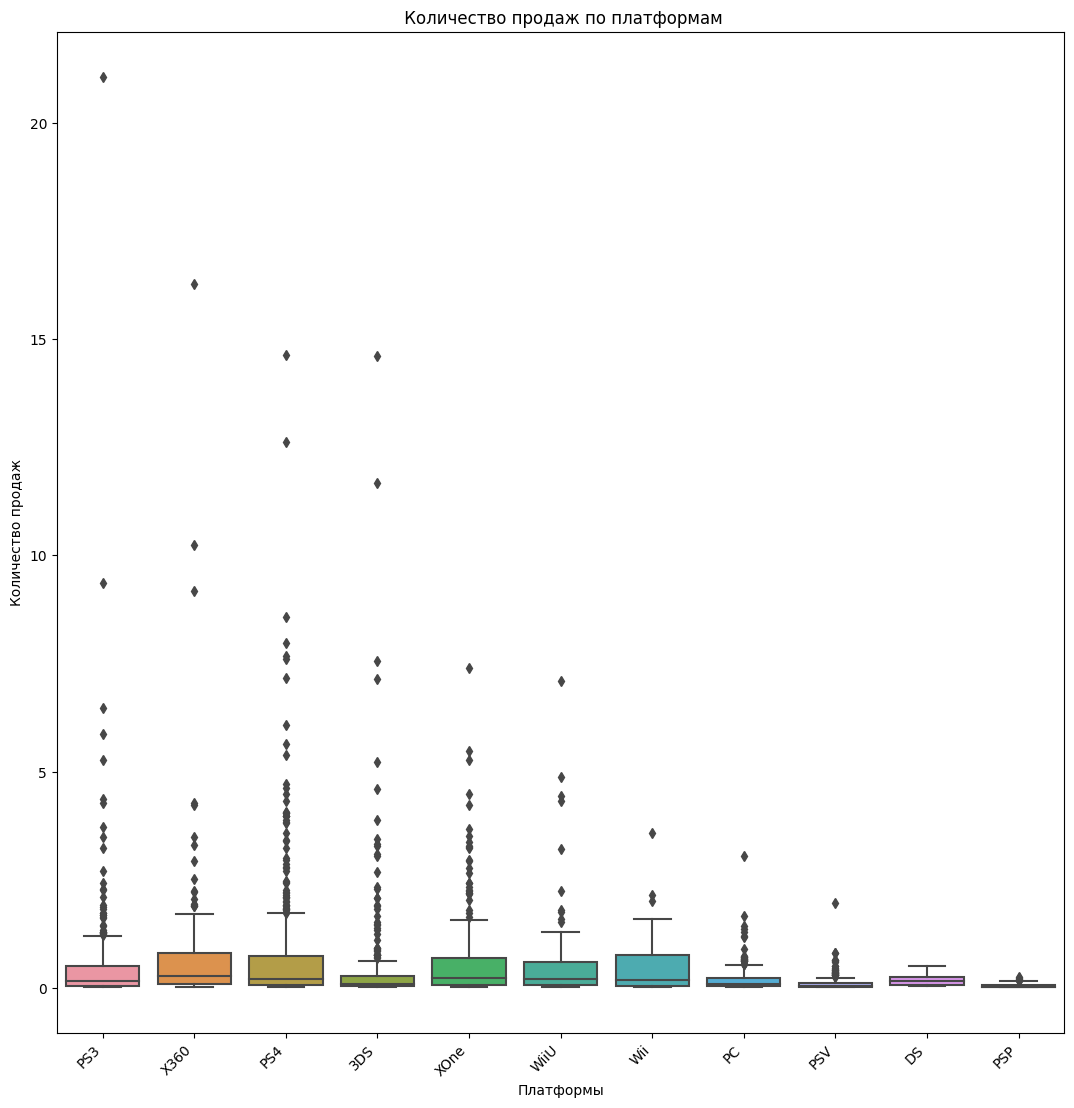

In [47]:
plt.figure(figsize=(13, 13))
sns.boxplot(x='platform', y=data['all_sales'], data=data)
plt.title(' Количество продаж по платформам')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')

plt.xticks(rotation=45,ha='right' );

### Вывод по количеству релизов и продаж по платформам в актуальный период

В 2014 и 2015 начался рост количества выпускаемых игр в это время можно выделить платформу PS4 с пиком продаж в 118.90 в 2015 году.

Как видно из графиков рост  по продажам в актуальный период  с 2013 по 2016 рост был только у двух платформ и только до 2015:

PS4	с пиком продаж в 118.90 в 2015 

XOne с пиком продаж в 60.14 в 2015 

Их можно отнести к потенциально прибыльным для дальнейшего исследования выберем именно  их.

Продажи остальных платформ в это время падали.


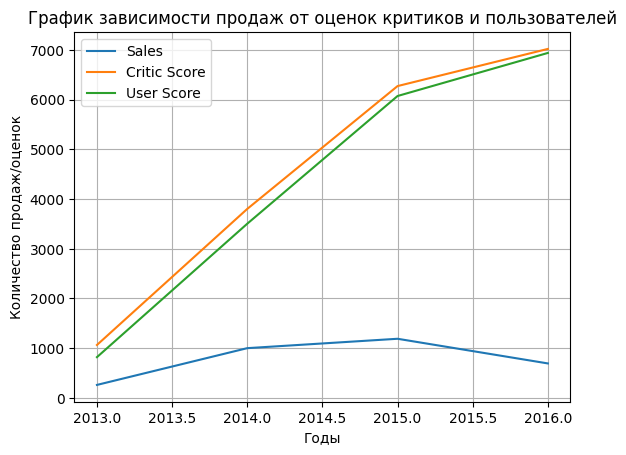

In [48]:
dataPS4 = data[(data['platform'] == 'PS4') & (data['year_of_release'] > 2012)]
dataPS4 = dataPS4.groupby(['year_of_release',]).agg({'all_sales': 'sum', 'critic_score': 'sum','user_score':'sum'}).reset_index()
plt.plot(dataPS4['year_of_release'].to_numpy() , dataPS4['all_sales'].to_numpy() *10, label='Sales')
plt.plot(dataPS4['year_of_release'].to_numpy() , dataPS4['critic_score'].to_numpy() , label='Critic Score')
plt.plot(dataPS4['year_of_release'].to_numpy() , dataPS4['user_score'].to_numpy() , label='User Score')

plt.title('График зависимости продаж от оценок критиков и пользователей')
plt.xlabel('Годы')
plt.ylabel('Количество продаж/оценок')


plt.legend()
plt.grid(True)
plt.show()


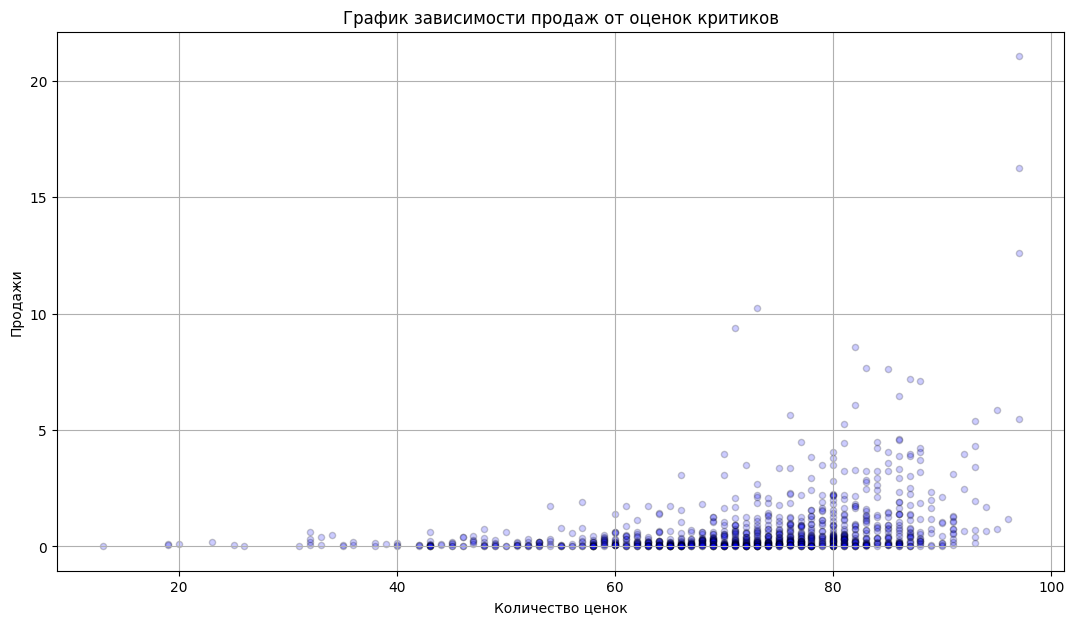

In [49]:
data[data['year_of_release'] >2012].plot(x='critic_score', y='all_sales', kind='scatter' ,grid=True, figsize = (13,7), color = 'blue', edgecolor = 'black',alpha=0.2,);

plt.title('График зависимости продаж от оценок критиков')

plt.xlabel('Количество ценок')
plt.ylabel('Продажи')

plt.grid(True)
plt.show()


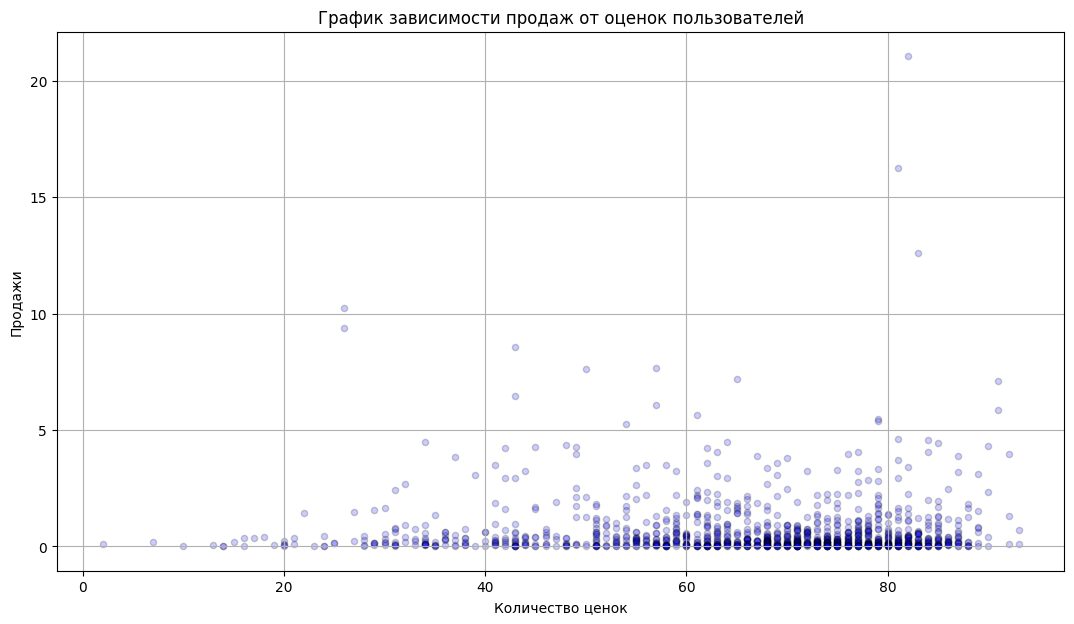

In [50]:
data[data['year_of_release'] >2012].plot(x='user_score', y='all_sales', kind='scatter' ,grid=True, figsize = (13,7), color = 'blue', edgecolor = 'black',alpha=0.2,);
plt.title('График зависимости продаж от оценок пользователей')
plt.xlabel('Количество ценок')
plt.ylabel('Продажи')

plt.grid(True)
plt.show()

In [51]:
corrmat=data[['all_sales','critic_score',
                'user_score',
                ]].corr(numeric_only=True)

In [52]:
corrmat

,all_sales,critic_score,user_score
all_sales,1.000000,0.313700,-0.002608
critic_score,0.313700,1.000000,0.502221
user_score,-0.002608,0.502221,1.000000


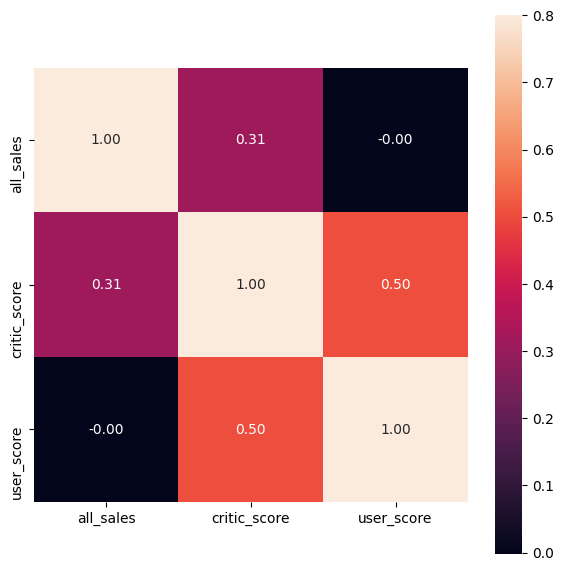

In [53]:
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt=".2f",);

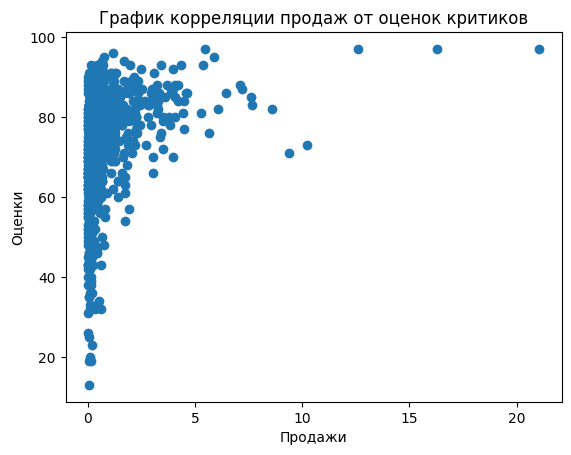

In [54]:
plt.scatter(data['all_sales'], data['critic_score'])
plt.title('График корреляции продаж от оценок критиков')

plt.xlabel('Продажи')
plt.ylabel('Оценки')
plt.show()

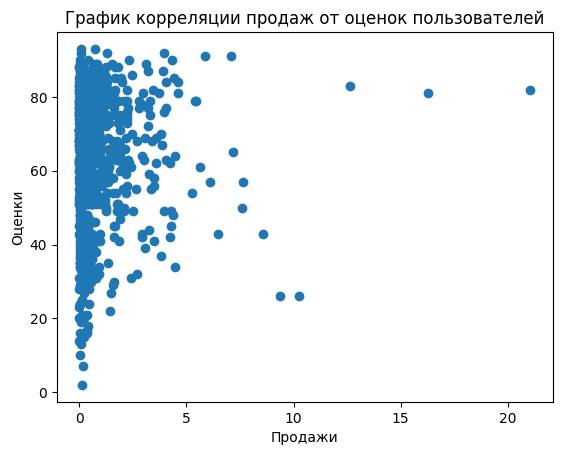

In [55]:
plt.scatter(data['all_sales'], data['user_score'])
plt.title('График корреляции продаж от оценок пользователей')
plt.xlabel('Продажи')
plt.ylabel('Оценки')
plt.show()

In [56]:
def data_user1 (data, index):
    print('Корреляционная матрица для DataFrame', index)    
    data[data['platform'] == index ]
    corrmat=data[['all_sales','critic_score',
                'user_score',
                ]].corr(numeric_only=True)

    f, ax = plt.subplots(figsize=(7, 7))
    sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt=".2f",);
    plt.show()

    plt.scatter(data['all_sales'], data['critic_score']) 
    plt.title('График корреляции продаж от оценок критиков')
    plt.xlabel('Продажи')
    plt.ylabel('Оценки')

    plt.show()
    
    plt.scatter(data['all_sales'], data['user_score'])
    plt.title('График корреляции продаж от оценок пользователей')
    plt.xlabel('Продажи')
    plt.ylabel('Оценки')
    plt.show()
    

Корреляционная матрица для DataFrame PS4


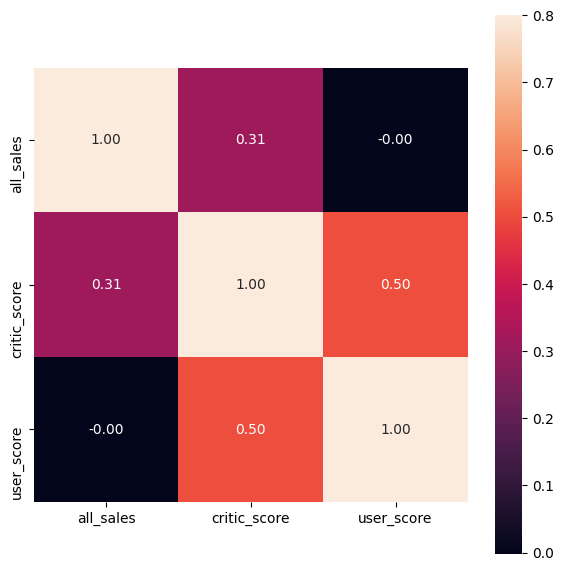

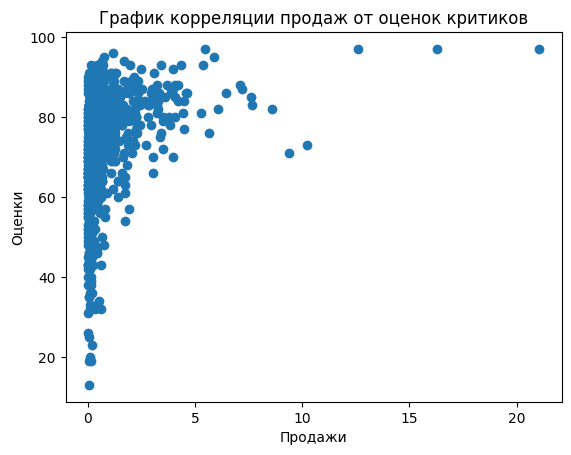

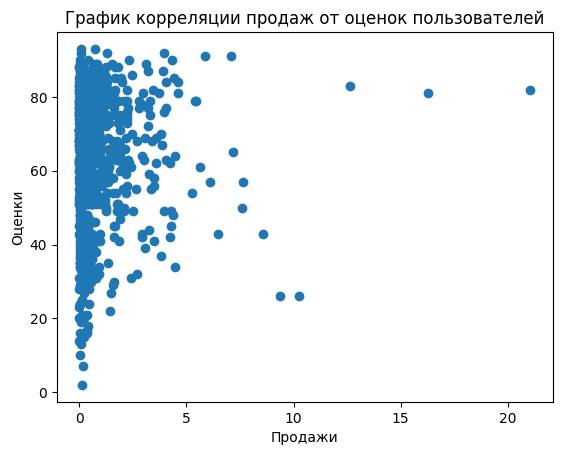

In [57]:
data_user1 (data, 'PS4')

Корреляционная матрица для DataFrame XOne


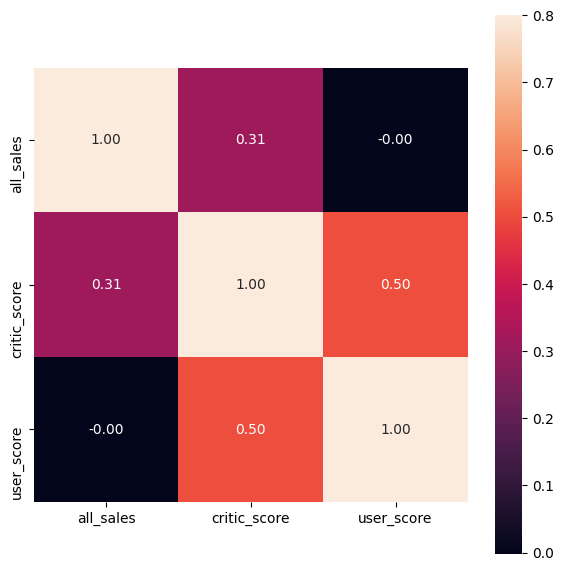

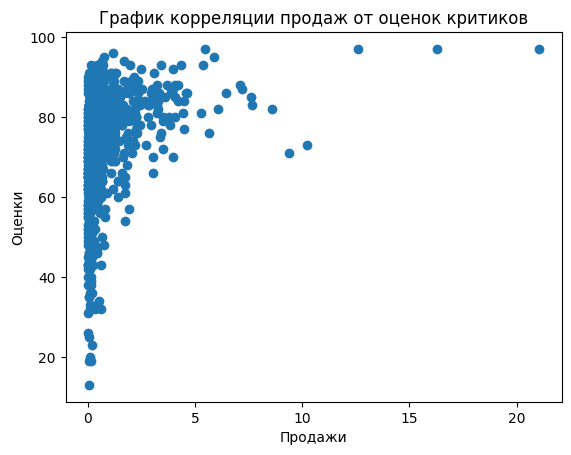

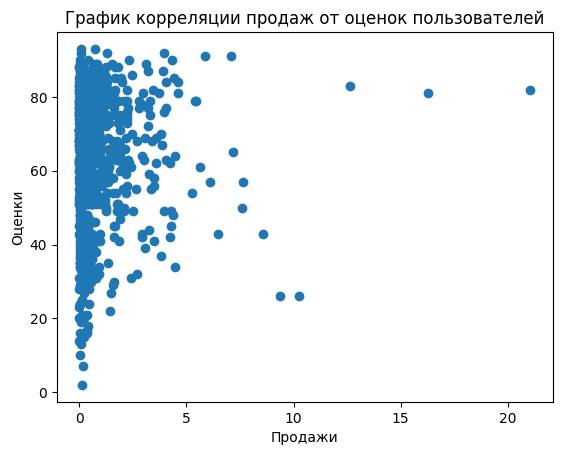

In [58]:
data_user1 (data, 'XOne')

Корреляционная матрица для DataFrame 3DS


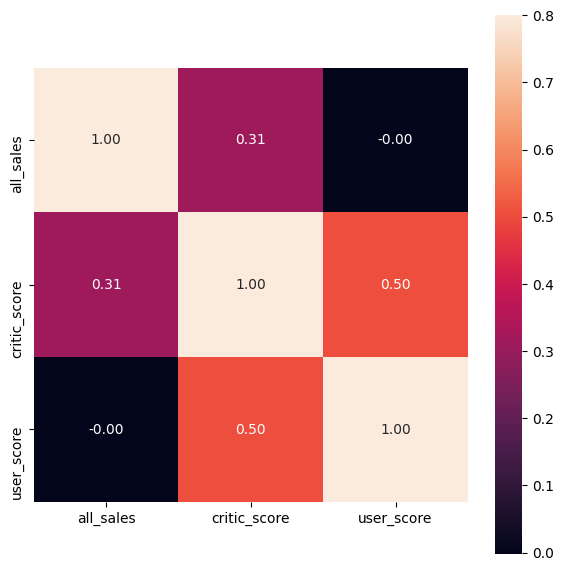

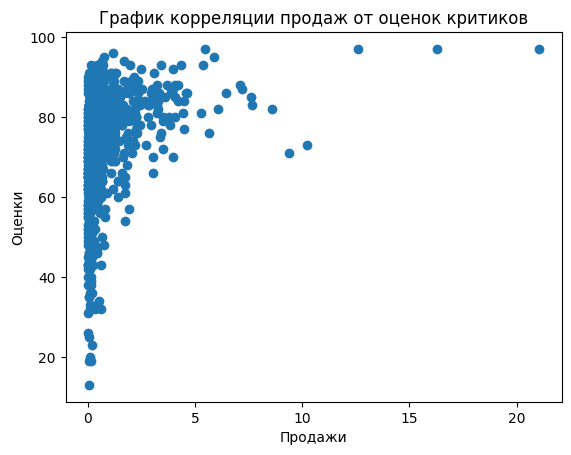

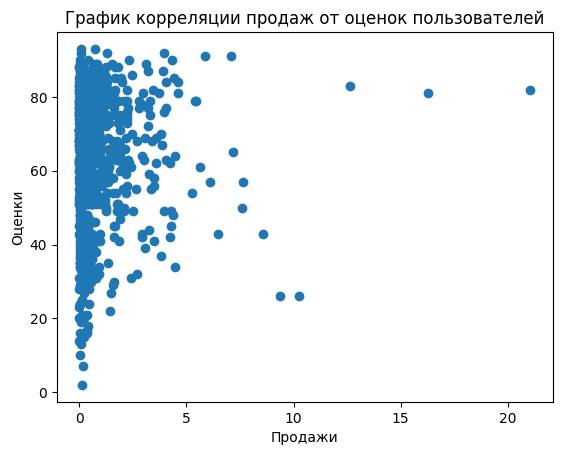

In [59]:
data_user1 (data, '3DS')

### Вывод по зависимости продаж от  оценкок игр

Из графиков, диаграмм и корреляционной матрицы видно, что продажи имеют очень слабую положительную зависимость от оценок критиков и очень слабую отрицательную зависимость от оценок пользователей.


In [60]:
data_genre = data.groupby(['genre']).size().reset_index(name='release_count')
data_genre_sale = data.groupby(['genre']).agg({'all_sales': 'sum'}).reset_index()
data_genre=data_genre.merge(data_genre_sale, on='genre')

In [61]:
data_genre

,genre,release_count,all_sales
0,Action,766,321.87
1,Adventure,245,23.64
2,Fighting,80,35.31
3,Misc,155,62.82
4,Platform,74,42.63
5,Puzzle,17,3.17
6,Racing,85,39.89
7,Role-Playing,292,145.89
8,Shooter,187,232.98
9,Simulation,62,21.76


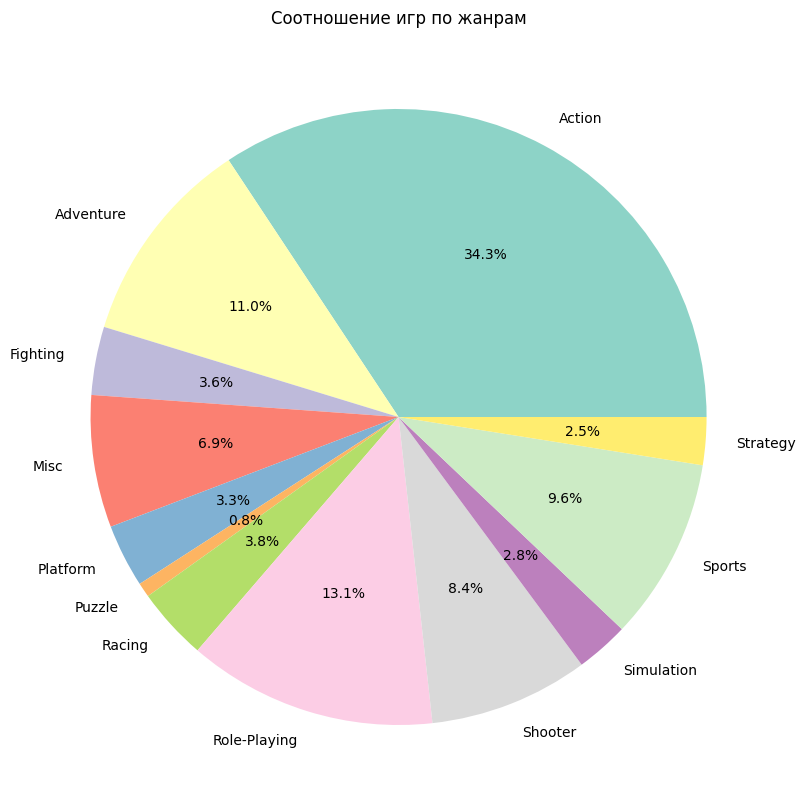

In [62]:
colors = plt.cm.Set3.colors
data_genre['release_count'].plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', labels=data_genre_sale['genre'], colors=colors)
plt.title('Cоотношение игр по жанрам') 
plt.ylabel("")
plt.show()

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Исправил ✔
</div>


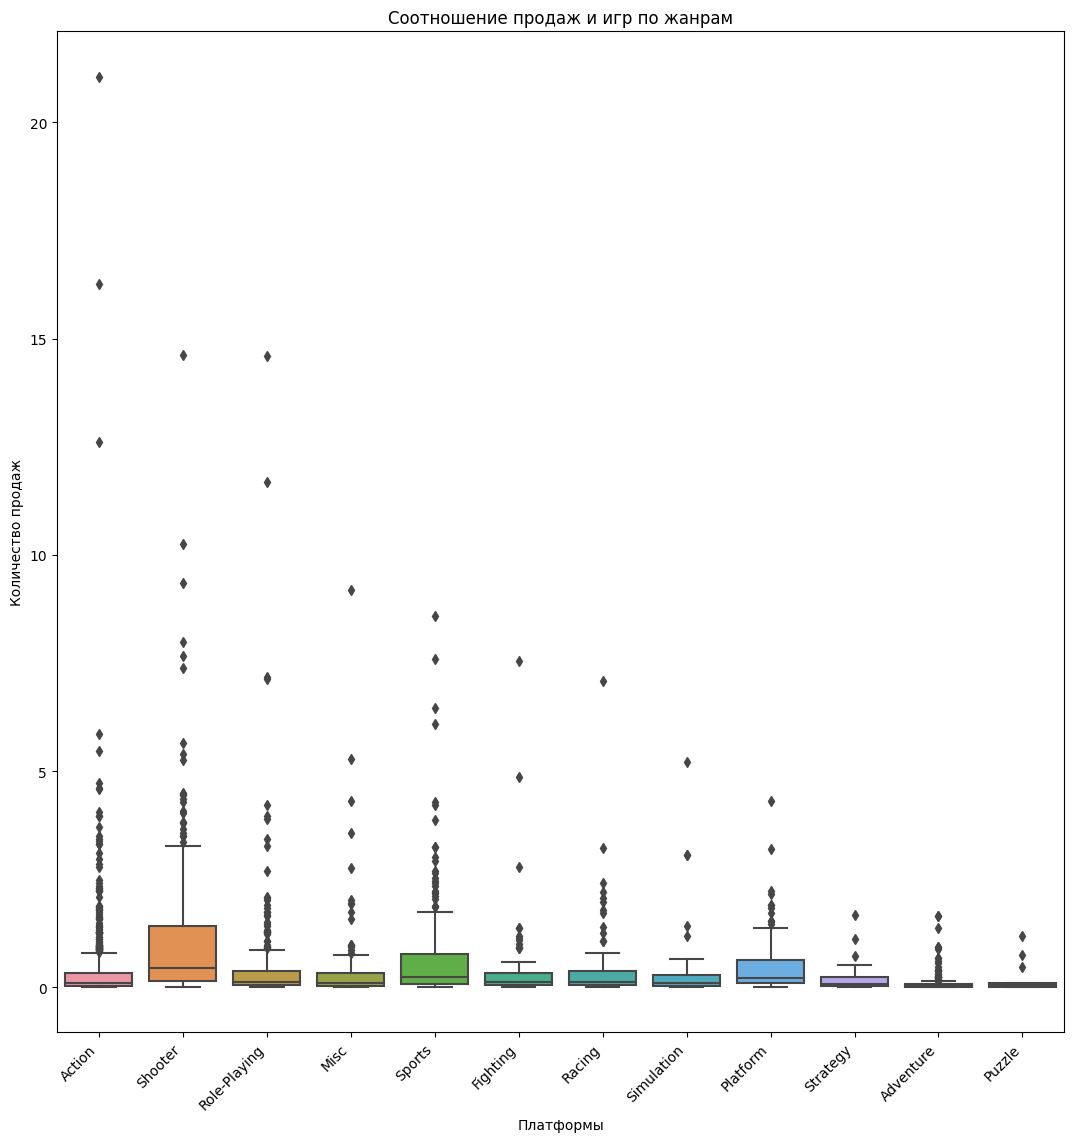

In [63]:
plt.figure(figsize=(13, 13))
sns.boxplot(x='genre', y='all_sales', data=data)
plt.title('Cоотношение продаж и игр по жанрам')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')

plt.xticks(rotation=45,ha='right' );

### Вывод по общему распределению игр по жанрам.
По распределению игр по жанрам можно сказать, что больше всего пользователей интересуют игры жанров Action, Role-playing Adventure. 

Можно отметить также что самые высокие  у игр жанра Shooter и Sport.

На основании полученных данных можно выделить несколько лидеров продаж PS4, Xbox, XOne. Wiii


### Выводы исследовательского анализа данных

### Вывод по количеству  релизов по платформам в разные года
По полученной сводной диаграмме мы видим исторический срез развития игр и  развития платформ.
Видно что в разные года  возникали разные плаформы, средний жизненый цикл платформы 8 лет в основном срок жизни платформы лежит в диапазоне от 5 до 10 лет. Стоит отмеить что платформы выпузенные с 1980 по 1988 имели максимальный срок жизни от 13 до 31 года. 
Это связано с началом развития индустрии игр.

Можно отметить что существенный рост  игровой индустрии начался в 1995 году и длился до 2010.

Начиная с 2010 количество выпускаемых игр стало падать.

Максимальное количество релизов было 2009-2010 году в эти года выпускалось по 1400 игры.

Максимальное количество релизов у платформы DS в 2008 году было выпушенно в 493 игры.


### Вывод по количеству  продаж по платформам в разные года

Стоит отметить следующие платформы, которые были лидерами рынка

PS в 1995-2000 с пиком продаж в 144.53 в 1999 году

PS2 в 2000-2005 с пиком продаж в 211.81 в 2004 году

Wii в 2005-2010  с пиком продаж 206.97 в 2009 году.


### Вывод по количеству  продаж  платформ лидеров в разные года

Стоит отметить следующие платформы, которые были лидерами рынка

PS2 в 2000-2005 с пиком продаж в 211.81 в 2004 году

Wii в 2005-2010  с пиком продаж 206.97 в 2009 году.

Учитвая полученные  результаты целесообразно взять актуальный период для прогноза 1/4-1/3 жизненого цикла продукта, это срок за который продук должен окупиться, учитывая средний жизненный цикл в 8 лет актуальный период следует принять в 2-3 года, соответсвенно это будет 2013-2016 год.

### Вывод по количеству релизов и продаж по платформам в актуальный период

В 2014 и 2015 начался рост количества выпускаемых игр в это время можно выделить платформу PS4 с пиком продаж в 118.90 в 2015 году.

Как видно из графиков рост  по продажам в актуальный период  с 2013 по 2016 рост был только у двух платформ и только до 2015:

PS4	с пиком продаж в 118.90 в 2015 

XOne с пиком продаж в 60.14 в 2015 

Их можно отнести к потенциально прибыльным для дальнейшего исследования выберем именно  их.

Продажи остальных платформ в это время падали.

### Вывод по зависимости продаж от  оценкок игр

Из графиков, диаграмм и корреляционной матрицы видно, что продажи имеют очень слабую положительную зависимость от оценок критиков и очень слабую отрицательную зависимость от оценок пользователей.

### Вывод по общему распределению игр по жанрам.

По распределению игр по жанрам можно сказать, что больше всего пользователей интересуют игры жанров Action, Role-playing Adventure. 

Можно отметить также что самые высокие  у игр жанра Shooter и Sport.

На основании полученных данных можно выделить несколько лидеров продаж PS4, Xbox, XOne. Wiii


# Составление портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5).

Опишите различия в долях продаж.

Самые популярные жанры (топ-5). 

Поясните разницу.

Влияние рейтинга ESRB на продажи в отдельном регионе.

In [64]:
def data_user1(data, index):
    
    
    data_user_platform = data.groupby(['platform']).agg({index: 'sum'}).reset_index().sort_values(index, ascending=False).reset_index(drop=True).head(5)
    display(data_user_platform)  
    
    data_user_platform[index].plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%',labels=data_user_platform['platform']);
    plt.title('Cоотношение игр по платформам') 
    plt.ylabel("")
    plt.show()
    
    
    data_user_genre= data.groupby(['genre']).agg({index: 'sum'}).reset_index().sort_values(index, ascending=False).reset_index(drop=True).head(5)   
    display(data_user_genre)   
 
    data_user_genre[index].plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%',labels=data_user_genre['genre']);
    plt.title('Cоотношение игр по жанрам') 
    plt.ylabel("")
    plt.show()

### Составление портрета пользователя  региона  Северной Америки (NA)

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


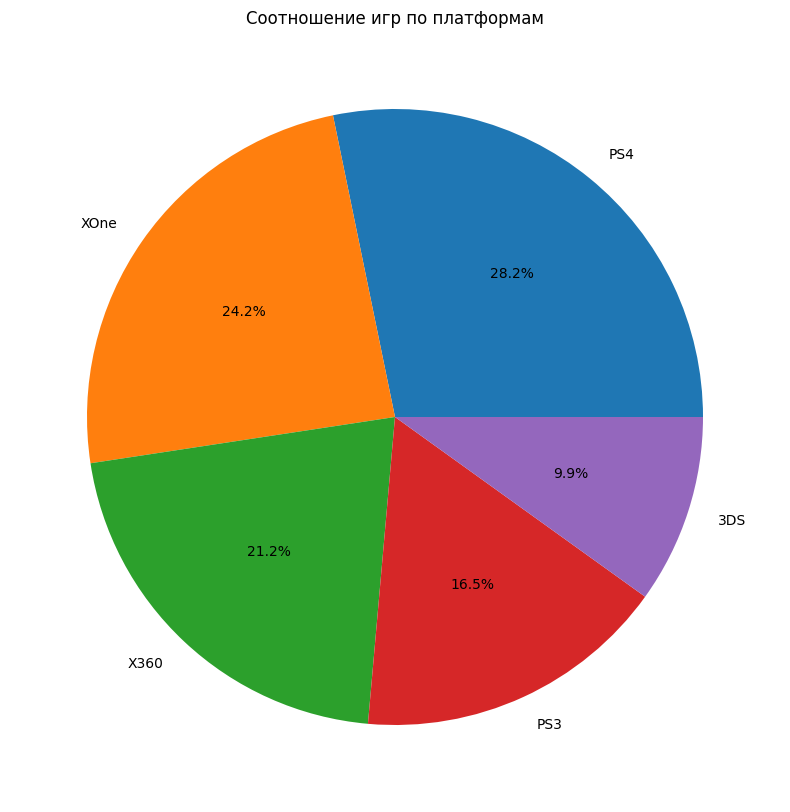

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


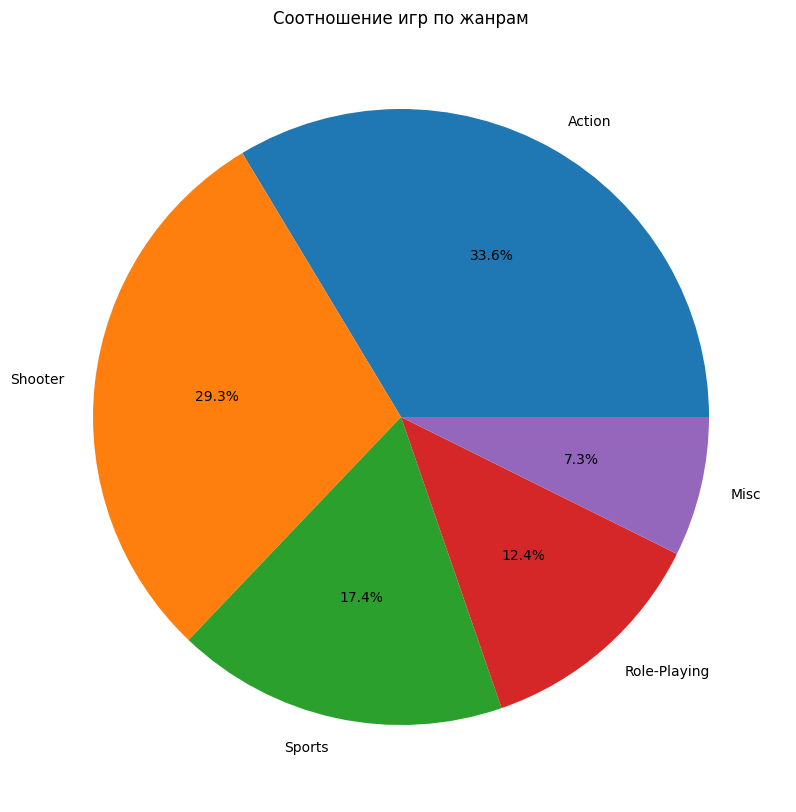

In [65]:
data_user1(data, 'na_sales')

Можно в регионе Северной Америки можно выделить три основные платформы  PS4, XOne, X360 популярные платформы, по жанрам пользователи преимущественно предпочитают  Action,  Shooter, Sport игры.

### Составление портрета пользователя  региона  Европа  (EU)

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


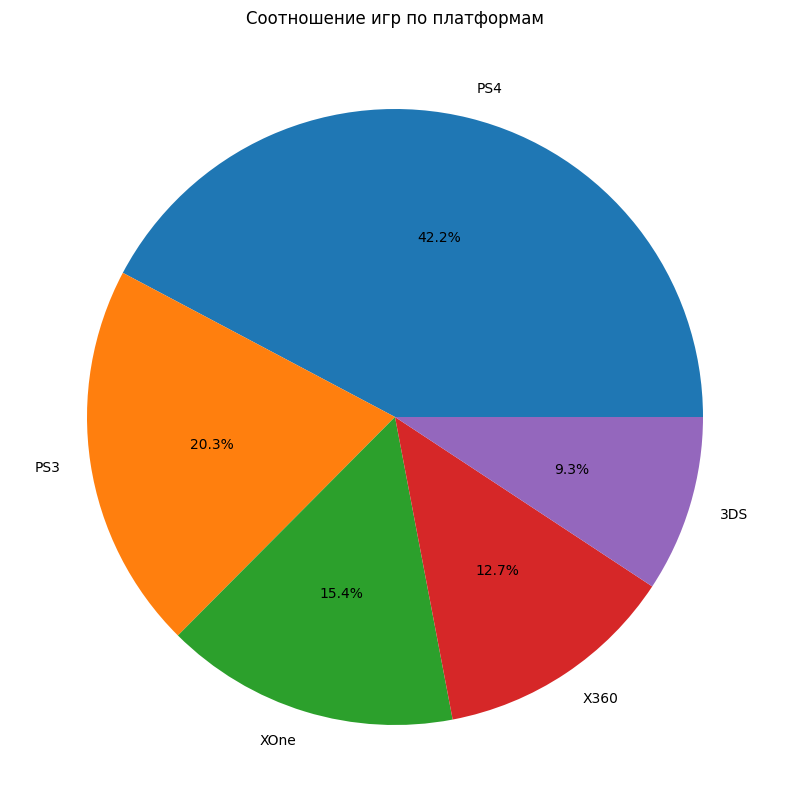

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


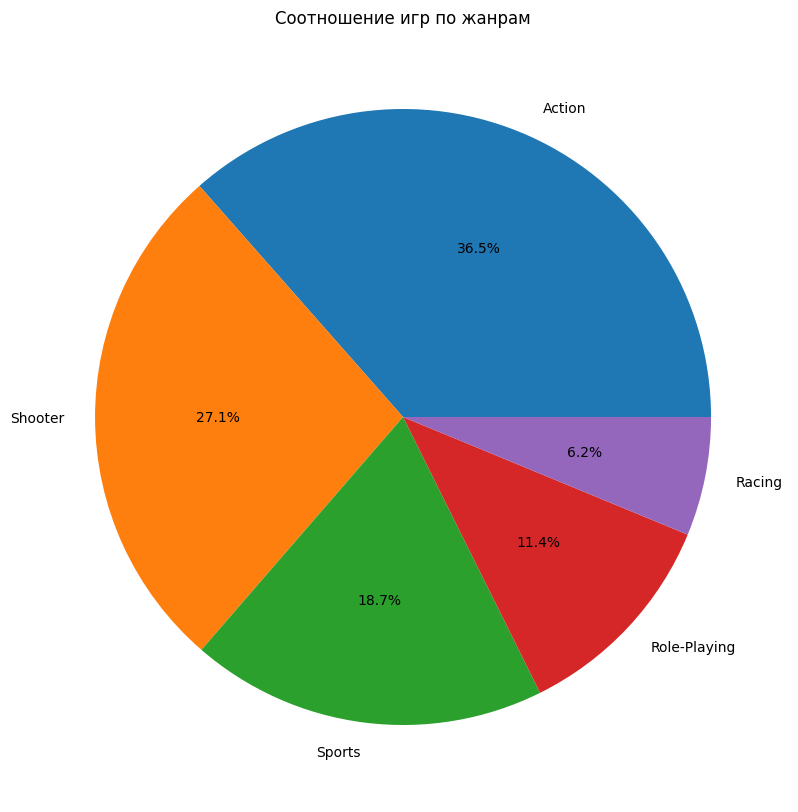

In [66]:
data_user1(data, 'eu_sales')

Можно в регионе Европы EU  можно выделить три основные платформы  PS4,PS3, XOne популярные платформы при этом PS4 занимает 42% рынка , по жанрам пользователи преимущественно предпочитают  Action,  Shooter, Sport игры.

### Составление портрета пользователя  региона  Япония  (JP)

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


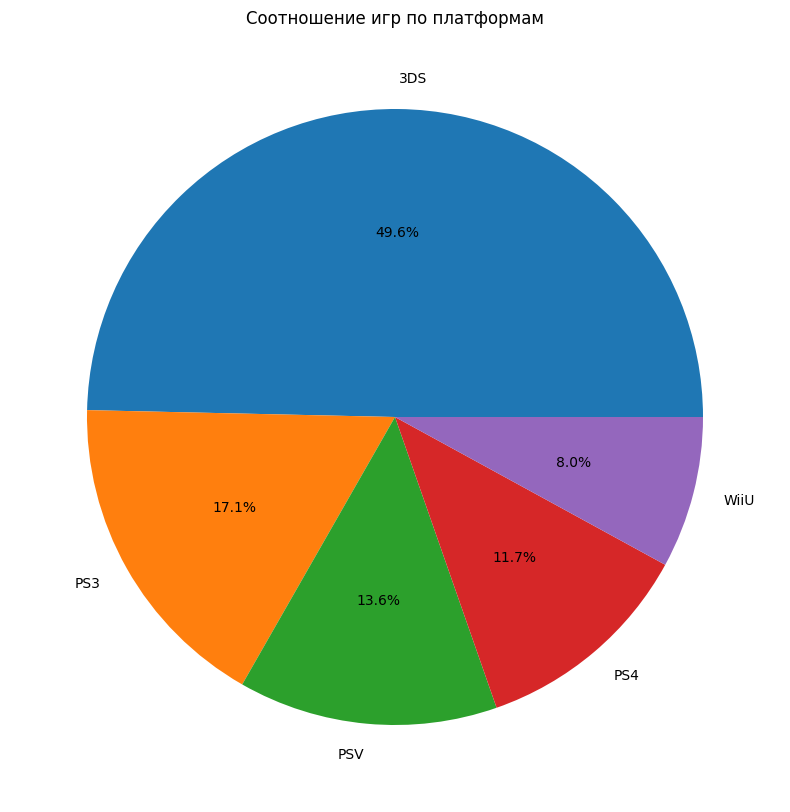

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


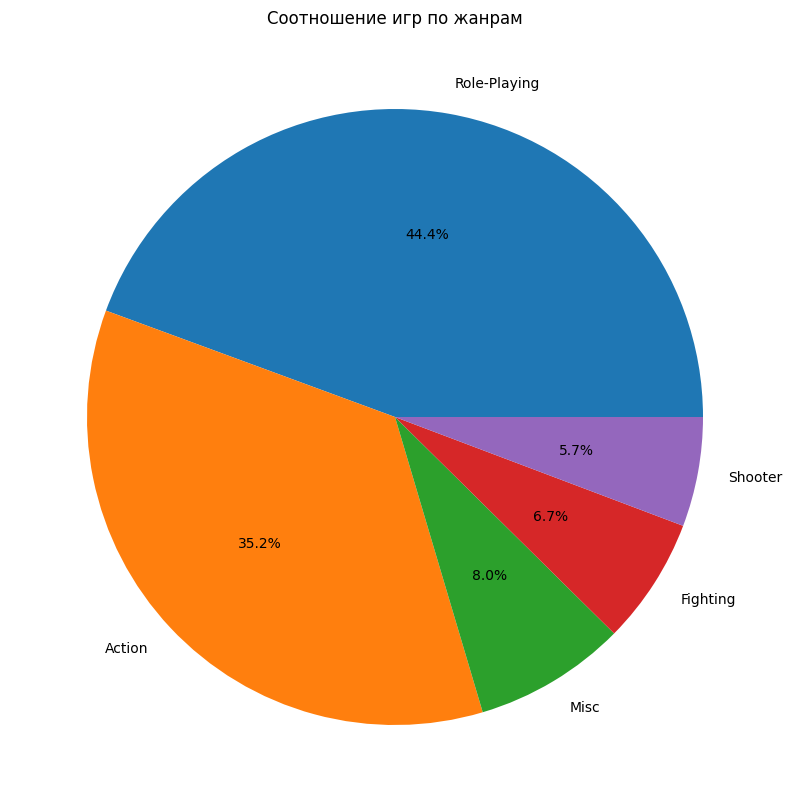

In [67]:
data_user1(data, 'jp_sales')

В регионе Японии JP половину рынка завоевала 3DS на втором месте стоит выделить PS3 с охватом рынка в 17%, однако используемы платформы  отличаются от  региона Америки и Европы, предпочтения по жанрам у  пользователей тоже другие,  на первом месте  с существенным отрывом стоят Role-Playing 44%  на втором Action, остающиеся 3 жанра распределены  равномерно.

# Влияние рейтинга ESRB на продажи в отдельном регионе.

In [79]:
data_user_all_rating = data.groupby(['rating']).agg({'na_sales': 'sum',
                              'eu_sales': 'sum',
                              'jp_sales': 'sum',}).reset_index()
data_user_all_rating

,rating,na_sales,eu_sales,jp_sales
0,E,79.05,83.36,15.14
1,E10+,54.24,42.69,5.89
2,M,165.21,145.32,14.11
3,T,49.79,41.95,20.59


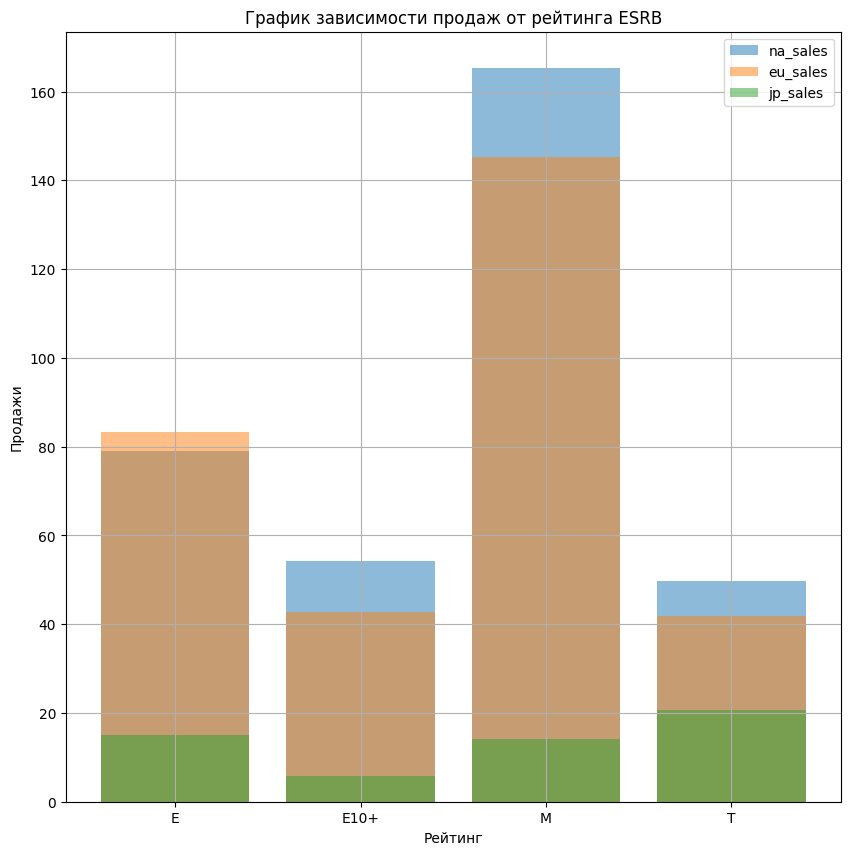

In [78]:
plt.figure(figsize=(10, 10))

plt.bar(data_user_all_rating['rating'].to_numpy() , data_user_all_rating['na_sales'].to_numpy() , alpha=0.5, label='na_sales')
plt.bar(data_user_all_rating['rating'].to_numpy() , data_user_all_rating['eu_sales'].to_numpy() , alpha=0.5, label='eu_sales')
plt.bar(data_user_all_rating['rating'].to_numpy() , data_user_all_rating['jp_sales'].to_numpy() , alpha=0.5, label='jp_sales')
plt.title('График зависимости продаж от рейтинга ESRB')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.legend()

plt.grid(True)
plt.show()

По полученным данным можно сказать, что наибольшее влияние рейтинга ESRB оказывает на странны Северной Америки, меньше на странны Европы, влияние рейтинга на Японию минимально.

### Вывод Составление портрета пользователя каждого региона

Можно в регионе Северной Америки можно выделить три основные платформы  PS4, XOne, X360 популярные платформы, по жанрам пользователи преимущественно предпочитают  Action,  Shooter, Sport игры.

Можно в регионе Европы EU  можно выделить три основные платформы  PS4,PS3, XOne популярные платформы при этом PS4 занимает 42% рынка , по жанрам пользователи преимущественно предпочитают  Action,  Shooter, Sport игры.

В регионе Японии JP половину рынка завоевала 3DS на втором месте стоит выделить PS3 с охватом рынка в 17%, однако используемы платформы  отличаются от  региона Америки и Европы, предпочтения по жанрам у  пользователей тоже другие,  на первом месте  с существенным отрывом стоят Role-Playing 44%  на втором Action, остающиеся 3 жанра распределены  равномерно.

Наиболее популярные платформы у пользователей является PS4, PS3, 3DS. Пользователи Северной Америки и Европы предпочитают PS4,  a  японские пользователи предпочитают 3DS

По жанрам пользователи предпочитают жанры Action, Shooter данные жанры присутствует во всех регионах.
Опять стоит отметить что пользователи Северной Америки и Европы имеет более схожие интересы чем у пользователей Японии.
Стоит отметить, что пользователи Японии очень увлечены Role-Playing этот жанр занимает 45% игрового рынка.

Влияние рейтинга ESRB на продажи, наибольшее влияние рейтинга ESRB оказывает на странны Северной Америки, меньше на странны Европы, влияние рейтинга на Японию минимально.

# Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action и Sports разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформулируем нулевую Ho  и альтернативную гипотезу H1.  Так как выборки выборки пользовательских рейтингов платформ XOne и PC независимые то воспользуемся  гипотезой «о равенстве средних двух генеральных совокупностей». 

Нулевая гипотеза (Но) - пользовательские рейтинги платформ одинаковые.

Альтернативная гипотеза (Н1) - пользовательские рейтинги платформ различаются.

Ввиду того что  предполагаемое возможное отклонение может быть и в большую, и в меньшую стороны примем двустороннюю альтернативную гипотезу.

In [70]:
datag1=data.dropna(subset=['user_score']).reset_index()
datag1['user_score'] = datag1['user_score'].astype('int64');
datag1PC=datag1[datag1['platform'] == 'PC']
datag1XOne=datag1[datag1['platform'] == 'XOne']


In [71]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(datag1XOne['user_score'], datag1PC['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 0.14012658403611722
Не получилось отвергнуть нулевую гипотезу


In [72]:
datag1.loc[datag1['platform'] == 'PC', 'user_score'].mean()


62.696774193548386

In [73]:
datag1.loc[datag1['platform'] == 'XOne', 'user_score'].mean()


65.21428571428571

Не получилось отвергнуть нулевую гипотезу есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковыми. Как видно средние значения рейтингов близки расхождение в пределах 4%.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую Ho  и альтернативную гипотезу H1. 
Так как выборки выборки пользовательских рейтингов жанров Action и Sports независимые то воспользуемся  гипотезой «о равенстве средних двух генеральных совокупностей». 

Нулевая гипотеза (Но) - пользовательские рейтинги жанров  равны.

Альтернативная гипотеза (Н1) - пользовательские рейтинги платформ различаются.

Ввиду того что  предполагаемое возможное отклонение может быть и в большую, и в меньшую стороны примем двустороннюю альтернативную гипотезу.

In [74]:
datag2act=datag1[datag1['genre'] == 'Action']
datag2sport=datag1[datag1['genre'] == 'Sports']

In [75]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(datag2act['user_score'], datag2sport['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.0517832389140778e-27
Отвергаем нулевую гипотезу


In [76]:
datag1.loc[datag1['genre'] == 'Action', 'user_score'].mean()

68.37532133676092

In [77]:
datag1.loc[datag1['genre'] == 'Sports', 'user_score'].mean()

52.38125

Нулевая гипотеза отвергнута есть основания полагать, что средние пользовательские рейтинги  жанров Action и Sports могут быть разными. Как видно средние значения рейтингов разные расхождение порядка 23%. 

### Вывод по проверке гипотез.
Было проверенно две гипотезы: 
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Средние пользовательские рейтинги жанров Action и Sports разные.

Не получилось отвергнуть нулевую гипотезу есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковыми. Как видно средние значения рейтингов близки расхождение в пределах 4%.

Нулевая гипотеза отвергнута есть основания полагать, что средние пользовательские рейтинги  жанров Action и Sports могут быть разными. Как видно средние значения рейтингов разные расхождение порядка 23%. 

# Вывод
### Вывод по анализу успешности игр на рынке.

Однозначно  можно сказать, что в 2017 году самым популярным направлением в жанрах игр будет Action, Shooter с выбором платформы все тоже очевидно не смотря  на падение продаж  лидером рынка является PS4.

Если оринтироваться на отдельно взятые регионы  то  следует  рассматривать следующие полатформы и жанры игр:

    Северная Америка - платформы PS4 и XOne, Жанры  Action и Shooter.

    Европа - платформы PS4, Жанры  Action и Shooter.

    Япония - платформы 3DS, Жанры  Role-Playing и Action.



### Выводы по подготовке данных

Заменены названия столбцов на нижний  регист (приведите к нижнему регистру);

### Преобразование данных в нужные типы.
Так как рейтинг пользователей и критиков отличается на десятки привели рейтинг пользователей к рейтингу критиков для упрочения анализа.
В столбцах year_of_release , critic_score, user_score заменен тип данных с float64 на int64, так как в данных столбцах используются только целые числа.
'user_score' заменим значения 'tbn' на 'nan' так как 'tbn' - to be determined Акроним служит для отметки неясностей или пропусков. В данном случае это говорит, что пользователь не определился с оценкой соотвественно. Что связь между рейтингом

Так как количество игр очень велико и  среди них могли быть не явно выраженные дубликаты  все названия игр привели к нижнему регисту

### Обработка пропусков:

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

Опишите причины, которые могли привести к пропускам;

Пропус в столбцах name и genre относится к двум записям 659 и 14244.
На основе данных из открытых источников https://en.wikipedia.org/wiki/Mortal_Kombat_II Можно установть, что данная запись относится к игре Mortal kombat 2 "The Genesis version went on to sell 1.78 million copies in the United States" "Release Arcade NA: November 1993"

По согласванию с преподователем данные о культовой игре Mortal kombat 2 восстановм их из доступных источников. Данные по записи 14244 найти не удалость по этому данную запись удалим.

Часть пропусков в стобце 'year_of_release' удалость восстановить по релизам игр на других платформах.

'tbn' - to be determined Акроним служит для отметки неясностей или пропусков.  В данном случае это говорит, что пользователь не  определился с оценкой соотвественно. Что связь между  рейтингом 


### Посчитаны суммарные продажи во всех регионах.
Добавлен столбец 'all_sales'c суммарными продажами во всех регионах.


### Выводы исследовательского анализа данных

### Вывод по количеству  релизов по платформам в разные года
По полученной сводной диаграмме мы видим исторический срез развития игр и  развития платформ.
Видно что в разные года  возникали разные плаформы, средний жизненый цикл платформы 8 лет в основном срок жизни платформы лежит в диапазоне от 5 до 10 лет. Стоит отмеить что платформы выпузенные с 1980 по 1988 имели максимальный срок жизни от 13 до 31 года. 
Это связано с началом развития индустрии игр.

Можно отметить что существенный рост  игровой индустрии начался в 1995 году и длился до 2010.

Начиная с 2010 количество выпускаемых игр стало падать.

Максимальное количество релизов было 2009-2010 году в эти года выпускалось по 1400 игры.

Максимальное количество релизов у платформы DS в 2008 году было выпушенно в 493 игры.

### Вывод по количеству  продаж по платформам в разные года

Стоит отметить следующие платформы, которые были лидерами рынка

    PS в 1995-2000 с пиком продаж в 144.53 в 1999 году

    PS2 в 2000-2005 с пиком продаж в 211.81 в 2004 году

    Wii в 2005-2010  с пиком продаж 206.97 в 2009 году.


### Вывод по количеству  продаж  платформ лидеров в разные года

Стоит отметить следующие платформы, которые были лидерами рынка

    PS2 в 2000-2005 с пиком продаж в 211.81 в 2004 году

    Wii в 2005-2010  с пиком продаж 206.97 в 2009 году.

Учитвая полученные  результаты целесообразно взять актуальный период для прогноза 1/4-1/3 жизненого цикла продукта, это срок за который продук должен окупиться, учитывая средний жизненный цикл в 8 лет актуальный период следует принять в 2-3 года, соответсвенно это будет 2013-2016 год.

### Вывод по количеству релизов и продаж по платформам в актуальный период

В 2014 и 2015 начался рост количества выпускаемых игр в это время можно выделить платформу PS4 с пиком продаж в 118.90 в 2015 году.

Как видно из графиков рост  по продажам в актуальный период  с 2013 по 2016 рост был только у двух платформ и только до 2015:

PS4	с пиком продаж в 118.90 в 2015 

XOne с пиком продаж в 60.14 в 2015 

Их можно отнести к потенциально прибыльным для дальнейшего исследования выберем именно  их.

Продажи остальных платформ в это время падали.

### Вывод по зависимости продаж от  оценкок игр

Из графиков, диаграмм и корреляционной матрицы видно, что продажи имеют очень слабую положительную зависимость от оценок критиков и очень слабую отрицательную зависимость от оценок пользователей.

### Вывод по общему распределению игр по жанрам.

По распределению игр по жанрам можно сказать, что больше всего пользователей интересуют игры жанров Action, Role-playing Adventure. 

Можно отметить также что самые высокие  у игр жанра Shooter и Sport.

На основании полученных данных можно выделить несколько лидеров продаж PS4, Xbox, XOne. Wiii


## Вывод Составление портрета пользователя каждого региона

Можно в регионе Северной Америки можно выделить три основные платформы  PS4, XOne, X360 популярные платформы, по жанрам пользователи преимущественно предпочитают  Action,  Shooter, Sport игры.

Можно в регионе Европы EU  можно выделить три основные платформы  PS4,PS3, XOne популярные платформы при этом PS4 занимает 42% рынка , по жанрам пользователи преимущественно предпочитают  Action,  Shooter, Sport игры.

В регионе Японии JP половину рынка завоевала 3DS на втором месте стоит выделить PS3 с охватом рынка в 17%, однако используемы платформы  отличаются от  региона Америки и Европы, предпочтения по жанрам у  пользователей тоже другие,  на первом месте  с существенным отрывом стоят Role-Playing 44%  на втором Action, остающиеся 3 жанра распределены  равномерно.

Наиболее популярные платформы у пользователей является PS4, PS3, 3DS. Пользователи Северной Америки и Европы предпочитают PS4,  a  японские пользователи предпочитают 3DS

По жанрам пользователи предпочитают жанры Action, Shooter данные жанры присутствует во всех регионах.
Опять стоит отметить что пользователи Северной Америки и Европы имеет более схожие интересы чем у пользователей Японии.
Стоит отметить, что пользователи Японии очень увлечены Role-Playing этот жанр занимает 45% игрового рынка.

Влияние рейтинга ESRB на продажи, наибольшее влияние рейтинга ESRB оказывает на странны Северной Америки, меньше на странны Европы, влияние рейтинга на Японию минимально.



## Вывод по проверке гипотез.

Было проверенно две гипотезы: 
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Средние пользовательские рейтинги жанров Action и Sports разные.

Не получилось отвергнуть нулевую гипотезу есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковыми. Как видно средние значения рейтингов близки расхождение в пределах 4%.

Нулевая гипотеза отвергнута есть основания полагать, что средние пользовательские рейтинги  жанров Action и Sports могут быть разными. Как видно средние значения рейтингов разные расхождение порядка 23%. 